In [1]:
%matplotlib inline

In [7]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

NameError: name 'reload' is not defined

In [8]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [9]:
# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [10]:
# Read in players data
players = pd.read_csv('datasetplayers.csv')
players.head()

,Id,Idade,Altura,Técnica,Passe,Chute,Força,Velocidade,Drible,Classe
0,1,17,177,72,65,72,60,84,81,Atacante
1,2,18,188,63,65,55,70,72,60,Defensor
2,3,18,190,63,65,67,70,72,66,Atacante
3,4,19,165,65,62,71,62,70,67,Atacante
4,5,19,174,67,66,69,64,76,74,Atacante


In [11]:
players_target = pd.read_csv('datasetnoclassplayers.csv')
players_target.head()

,Id,Idade,Altura,Técnica,Passe,Chute,Força,Velocidade,Drible,Classe
0,201,19,186,71,67,52,77,75,65,?
1,202,19,175,65,63,66,60,82,70,?
2,203,20,181,64,64,67,70,67,68,?
3,204,20,170,69,66,70,62,76,75,?
4,205,21,176,66,61,68,65,75,72,?


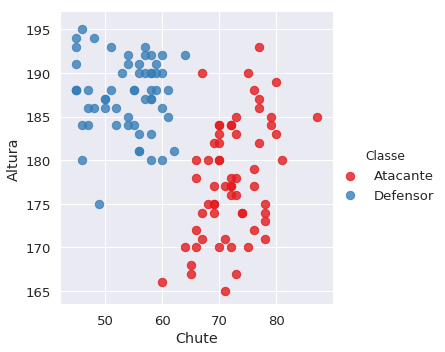

In [12]:
# Plot two ingredients
sns.lmplot('Chute', 'Altura', data=players, hue='Classe',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [13]:
X, y = players.iloc[:,:-1].values, players.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [14]:
model = SVC()
model.fit (X_train, y_train)

/home/alfredo/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
predictions = model.predict(X_test)

In [16]:
print(confusion_matrix(y_test, predictions))

[[17  0]
 [19  0]]


In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Atacante       0.47      1.00      0.64        17
    Defensor       0.00      0.00      0.00        19

   micro avg       0.47      0.47      0.47        36
   macro avg       0.24      0.50      0.32        36
weighted avg       0.22      0.47      0.30        36



/home/alfredo/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}

In [19]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=5)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9642857142857143, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] .................. C=0.1, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] .................. C=0.1, kernel=linear, score=1.0, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9642857142857143, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................... C=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] .................... C=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, k

/home/alfredo/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


{'C': 0.1, 'kernel': 'linear'}

In [20]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test, grid_predictions))

[[16  1]
 [ 0 19]]


In [21]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

    Atacante       1.00      0.94      0.97        17
    Defensor       0.95      1.00      0.97        19

   micro avg       0.97      0.97      0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [48]:
X_target, y = players_target.iloc[:,:-1].values, players_target.iloc[:,-1].values

result = grid.predict(X_target)
for i in range(len(result)):
    players_target['Classe'][i] = result[i]
    
display(players_target)

/home/alfredo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Id,Idade,Altura,Técnica,Passe,Chute,Força,Velocidade,Drible,Classe
0,201,19,186,71,67,52,77,75,65,Defensor
1,202,19,175,65,63,66,60,82,70,Defensor
2,203,20,181,64,64,67,70,67,68,Defensor
3,204,20,170,69,66,70,62,76,75,Atacante
4,205,21,176,66,61,68,65,75,72,Defensor
5,206,22,171,64,65,66,60,78,71,Defensor
6,207,22,176,70,72,70,64,77,77,Atacante
7,208,22,188,72,69,50,76,75,65,Defensor
8,209,22,180,68,74,67,71,72,71,Defensor
9,210,22,177,67,68,69,65,77,73,Defensor
